In [1]:
import torch 
import torch.nn as nn 

import torchvision # for datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
# device config 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper-parameters
input_size = 28*28 # 28x28 images 
hidden_size = 200 
num_classes = 10 
num_epochs = 4
batch_size = 100 
learning_rate = 0.001 

### Training and test set 

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', # creates folder
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True,
                                           )

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          )                               

In [34]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           )

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size,
                                          shuffle=False,
                                          )                                            

In [35]:
examples = iter(train_loader)
samples, labels = next(examples)

# print shape of samples and labels tensors
print(f'Training samples shape is: {samples.shape}')
print(f'Training labels shape is: {labels.shape}')
print('')
print(f'The first dimension coincides with batch_size={batch_size}')
print('')
print('The second dimension coincides with the number of channels of the images (1)')

Training samples shape is: torch.Size([100, 1, 28, 28])
Training labels shape is: torch.Size([100])

The first dimension coincides with batch_size=100

The second dimension coincides with the number of channels of the images (1)


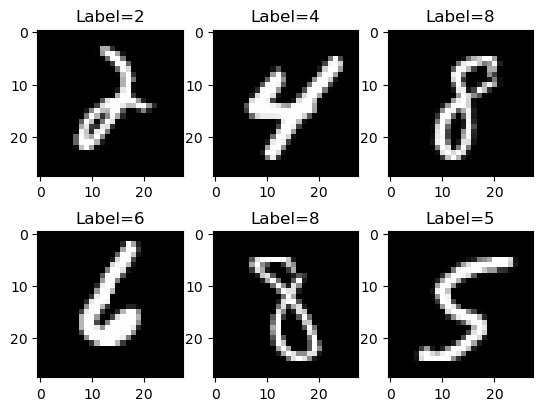

In [36]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.title(f'Label={labels[i]}')
plt.show()

In [37]:
class MiRedNeuronal(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MiRedNeuronal, self).__init__()
        self.capa_linear = nn.Linear(input_size, hidden_size)
        self.activar = nn.ReLU()
        self.otra_capa_linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.capa_linear(x)
        out = self.activar(out)
        out = self.otra_capa_linear(out)

        return out 
    

In [38]:
model = MiRedNeuronal(input_size=input_size,
                      hidden_size=hidden_size,
                      output_size=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr = learning_rate)          

# training loop 
n_total_steps = len(train_loader)       

for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader): 

        # images are [100, 1, 28, 28] but input_size=784
        images = images.reshape(-1, 28*28)

        images = images.to(device)
        labels = labels.to(device)

        # forward 
        ouputs = model(images)
        loss = criterion(ouputs, labels)

        # backward
        # empty grads
        optimizer.zero_grad()
        #compute gradients
        loss.backward()
        # update parameters
        optimizer.step()

        # verbosity 
        if (idx+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}; step {idx+1}/{n_total_steps}, loss={loss.item():.4f}') 



epoch 1/4; step 100/600, loss=0.4366
epoch 1/4; step 200/600, loss=0.3219
epoch 1/4; step 300/600, loss=0.3310
epoch 1/4; step 400/600, loss=0.2274
epoch 1/4; step 500/600, loss=0.3064
epoch 1/4; step 600/600, loss=0.1780
epoch 2/4; step 100/600, loss=0.1807
epoch 2/4; step 200/600, loss=0.2149
epoch 2/4; step 300/600, loss=0.1365
epoch 2/4; step 400/600, loss=0.2286
epoch 2/4; step 500/600, loss=0.1882
epoch 2/4; step 600/600, loss=0.0971
epoch 3/4; step 100/600, loss=0.2097
epoch 3/4; step 200/600, loss=0.1773
epoch 3/4; step 300/600, loss=0.1102
epoch 3/4; step 400/600, loss=0.1053
epoch 3/4; step 500/600, loss=0.0570
epoch 3/4; step 600/600, loss=0.1851
epoch 4/4; step 100/600, loss=0.1863
epoch 4/4; step 200/600, loss=0.0736
epoch 4/4; step 300/600, loss=0.1707
epoch 4/4; step 400/600, loss=0.1519
epoch 4/4; step 500/600, loss=0.1964
epoch 4/4; step 600/600, loss=0.0706


In [59]:
with torch.no_grad():
    n_correct = 0 
    n_samples = 0 

    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        max_values, predictions = torch.max(outputs, 1)

        n_samples += labels.shape[0]

        n_correct = (predictions==labels).sum().item()

    acc = 100 * n_correct/n_samples

    print(f'Accuracy on test set = {acc:.4f}')

        

Accuracy on test set = 0.9400


In [58]:
torch.max(outputs,1)

torch.return_types.max(
values=tensor([ 4.4921,  5.2091,  5.8699,  4.4622,  1.5156,  3.7506,  3.2002,  5.0683,
         8.8760,  9.2362,  4.3931,  9.6996,  5.4002,  6.6739,  6.0144,  5.3882,
         5.6365,  8.6714,  6.4997,  9.1350,  6.3930,  6.0175,  3.7917,  6.3720,
         6.6616,  2.0085,  2.9016,  4.3474,  5.4800,  7.1910,  8.7019,  5.4534,
         6.8815,  9.5758,  6.2866,  8.1271,  5.8448,  9.6181,  8.5712,  9.3885,
         4.0791,  2.3092,  9.3831,  2.6687,  4.4863,  6.8357,  4.9947,  6.2496,
         8.0376,  7.4381,  5.6300,  6.7971, 12.5470,  4.5506,  5.1394,  3.3942,
         5.9775,  6.9784,  7.1223,  2.1980,  8.4699,  7.8622,  6.7299,  7.0047,
         7.1186,  7.4816,  7.3021,  5.5796,  9.1540,  6.0188,  6.5076,  5.8815,
         8.8048,  7.8172,  6.8169,  2.9855,  5.6162,  5.7291,  6.5628,  8.3106,
         6.5210,  6.7881,  3.4931, 13.7673,  5.2261,  7.2894,  4.6968,  9.9713,
         9.6141, 12.6671, 10.9194,  9.0156,  6.8532,  9.7960,  5.8392, 12.0188,
         

## Let's try to improve the accuracy

In [65]:
class NeuralNetMejorada(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetMejorada, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.activar = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, int(hidden_size/2.0))
        self.l3 = nn.Linear(int(hidden_size/2.0), output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.activar(out)
        out = self.l2(out)
        out = self.activar(out)
        out = self.l3(out)

        return out 

In [66]:
model = NeuralNetMejorada(input_size=input_size,
                      hidden_size=hidden_size,
                      output_size=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr = learning_rate)          

# training loop 
n_total_steps = len(train_loader)       

for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader): 

        # images are [100, 1, 28, 28] but input_size=784
        images = images.reshape(-1, 28*28)

        images = images.to(device)
        labels = labels.to(device)

        # forward 
        ouputs = model(images)
        loss = criterion(ouputs, labels)

        # backward
        # empty grads
        optimizer.zero_grad()
        #compute gradients
        loss.backward()
        # update parameters
        optimizer.step()

        # verbosity 
        if (idx+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}; step {idx+1}/{n_total_steps}, loss={loss.item():.4f}') 



epoch 1/4; step 100/600, loss=0.2954
epoch 1/4; step 200/600, loss=0.2840
epoch 1/4; step 300/600, loss=0.1952
epoch 1/4; step 400/600, loss=0.2691
epoch 1/4; step 500/600, loss=0.1376
epoch 1/4; step 600/600, loss=0.2084
epoch 2/4; step 100/600, loss=0.1086
epoch 2/4; step 200/600, loss=0.2118
epoch 2/4; step 300/600, loss=0.1456
epoch 2/4; step 400/600, loss=0.1656
epoch 2/4; step 500/600, loss=0.1755
epoch 2/4; step 600/600, loss=0.0932
epoch 3/4; step 100/600, loss=0.0287
epoch 3/4; step 200/600, loss=0.1238
epoch 3/4; step 300/600, loss=0.0810
epoch 3/4; step 400/600, loss=0.1499
epoch 3/4; step 500/600, loss=0.0203
epoch 3/4; step 600/600, loss=0.1229
epoch 4/4; step 100/600, loss=0.0412
epoch 4/4; step 200/600, loss=0.0213
epoch 4/4; step 300/600, loss=0.0377
epoch 4/4; step 400/600, loss=0.0526
epoch 4/4; step 500/600, loss=0.0864
epoch 4/4; step 600/600, loss=0.1281


In [67]:
with torch.no_grad():
    n_correct = 0 
    n_samples = 0 

    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        max_values, predictions = torch.max(outputs, 1)

        n_samples += labels.shape[0]

        n_correct = (predictions==labels).sum().item()

    acc = 100 * n_correct/n_samples

    print(f'Accuracy on test set = {acc:.4f}')

Accuracy on test set = 0.9700
